In [3]:
# 패션 MNIST 데이터
import keras
(_train_input, _train_target), (_test_input, _test_target) = keras.datasets.fashion_mnist.load_data()

In [4]:
print(_train_input.shape, _test_input.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
# 훈련세트, 검증 세트
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_input = train_test_split(
    _train_input, _train_target, test_size=0.2, random_state=42
)

In [7]:
# 데이터 구성
_train_target[:10] # 0~9

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [8]:
import numpy as np
np.unique(_train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

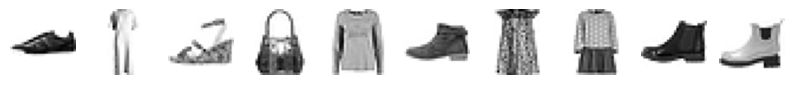

In [9]:
# 훈련세트 이미지 확인 
import matplotlib.pyplot as plt
_, axs = plt.subplots(1,10,figsize=(10,1))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')

In [16]:
# # 정규화, 0~1 - MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler
# ms = MinMaxScaler()
# ms.fit(_train_input.reshape(-1, 28*28))
# train_scaled = ms.transform(_train_input.reshape(-1, 28*28))
# train_scaled[0]

# 정규화, 0~1 / 255로 나누는 방법
train_scaled = _train_input / 255
train_scaled = train_scaled.reshape(-1,28*28) # 학습을 위한 2차원 배열 구조변경 28 * 28 -> 784

train_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
# SGDClassifier : 입력층, 출력층
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
sg = SGDClassifier()
cv = cross_validate(sg, train_scaled, _train_target, n_jobs=-1, return_train_score=True)
print("훈련세트:", np.mean(cv['train_score']))
print("테스트세트:", np.mean(cv['test_score']))

훈련세트: 0.8552708333333333
테스트세트: 0.83605


In [18]:
# 은닉층(밀집층)을 추가한 성능 개선 - DNN(Deep Neural Network)

In [19]:
from sklearn.model_selection import train_test_split
_train_scaled, val_scaled,  _train_target, val_target = train_test_split(
    train_scaled, _train_target, test_size=0.2, random_state=42
)

In [20]:
import keras

In [22]:
inputs = keras.layers.Input(shape=(784,))
output = keras.layers.Dense(10, activation='softmax')
model = keras.Sequential([inputs,output])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)